 __Graduate Research Assistantship(Sagar Mehta) Twitter Text Analysis__

# __Business Problem__: 

**Business Problem:** <br>
* Domestic abuse, also called "domestic violence" or "intimate partner violence", can be defined as a pattern of behavior in any relationship that is used to gain or maintain power and control over an intimate partner.<br>
* Abuse is physical, sexual, emotional, economic or psychological actions or threats of actions that influence another person.<br> 
* This includes any behaviors that frighten, intimidate, terrorize, manipulate, hurt, humiliate, blame, injure, or wound someone.<br> 
* Domestic abuse can happen to anyone of any race, age, sexual orientation,religion, or gender.<br> 
* It can occur within a range of relationships including couples who are married, living together or dating.<br>
* Domestic violence affects people of all socioeconomic backgrounds and education levels. <br>
* Our goal is to identify different factors that cause domestic violence, especially __Substance Abuse__ and __Mental Health__.
    

# __Work Accomplished__

**Work Done**:
* During 4 months we have tried to establish relation between Domestic Violence and other factors cuasing it <br>
* Scraping Data from <a href="https://twitter.com">Twitter </a> using keywords like __Domestic Violence__ and __Substance Abuse__ <br>
* Scraping done with the help of <a href="https://github.com/JustAnotherArchivist/snscrape">snscrape </a> and <a href="https://github.com/twintproject/twint">twint</a>, click on the link for more information <br>
* _Data preprocessing_: <br>
    * Tokenizing <br>
    * Removing stopwords,punctuation,numbers <br>
    * Converting to lower case <br>
    * Lemmatizing <br>
    * Stemming <br>
* _Exploratory Data Analysis_: <br>
    * Word Cloud
    * N-gram analysis
    * Top keywords frequency count
* Topic Modeling
* Time Series Analysis
* Researching Domestic Violence Organizations
    

# __Week 1: Domestic Violence__

## __Data Introduction and Steps followed__

### Step 1: Read the libraries

 In this step we import the required fundamental libraries

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

We have scraped data for the keyword __Domestic Violence__. <br>
* The total number of 100,000 tweets scraped <br>
* The library used is snscrape

In [5]:
dv = pd.read_csv('domestic violence_week1.csv')
dv.sample(5)

Unnamed: 0                   Datetime      Tweet Id  \
66289       66289  2021-12-07 14:52:47+00:00  1.468230e+18   
54984       54984  2021-12-14 16:33:45+00:00  1.470790e+18   
94952       94952  2021-11-23 05:07:30+00:00  1.463010e+18   
1691         1691  2022-01-19 01:15:58+00:00  1.483610e+18   
51435       51435  2021-12-16 16:29:21+00:00  1.471520e+18   

                                                    Text         Username  \
66289  @susannareid100 Hi susanna I hope you are ok a...      gemruss2020   
54984  Here's a clip from a recent Project Alpha sess...      lambda_rock   
94952  @dannowicki @raystern She was a champion for d...  RogerDa06325885   
1691   Ryan Giggs domestic violence trial delayed due...     MR_SAXOBEAT_   
51435  कोरोना काल में सबसे अधिक महिलाएं घरेलू हिंसा क...    NewsGramHindi   

       Like Count             Display Name Language  
66289           0            Gemma Collins       en  
54984           3  Pi Lambda (Little Rock)       en  
94952           0              Mr Rhetoric       en  
1691            0               Juan Wesly       en  
51435           1           NewsGram Hindi       hi

The dataset contains the following information:

| **Field**   |     **Description**      |  
|-------------|-------------|
| Datetime  |  The date and time information when the tweet was tweeted | 
| Tweet Id  |  The unique tweet identification number |
|Text| The actual tweet|
|Username| The username who actually tweeted|
|Like Count| The count of likes a tweet got|
|Display Name| The actual name of the user|
|Language| The language in which the tweet was made|

## __Data Preprocessing__

The following are the steps we followed to clean the data: <br>
* Create a function that does the following task <br>
    * Tokenization <br>
    * Remove Special Characters <br>
    * Remove numbers <br>
    * Convert to lowercase <br>
    
These steps are very important when it comes to cleaning text data

    


In [7]:
def tweet_cleaner(text):
    from nltk.tokenize import WordPunctTokenizer
    tokenizer = WordPunctTokenizer()
    import re
    text=re.sub(r'@+','',str(text))
    text=re.sub('http?://[A-Za-z0-9./]+','',str(text))
    text=re.sub("[^a-zA-Z]", " ",str(text))
    lower_case = text.lower()
    words = tokenizer.tokenize(lower_case)
    return (" ".join(words)).strip()

We need to further clean the data and we use <a href = "https://www.nltk.org/">nltk </a> <br>
We follow the following steps:
* Import nltk library and import the required functionality
* Tokenize
* Remove stopwords
* Lemmatize

In [52]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import  wordnet
from nltk.stem import WordNetLemmatizer

#Tokenize Function
def Tokenize(string):
    tokens=nltk.tokenize.word_tokenize(string)
    return " ".join(tokens)

#RemoveStopWordsFunction
def RemoveStopWords(string):
    #Removing Punctuations
    for each in punctuation:
        string=string.replace(each,"")
    
    #Removing Stopwords
    english_stopwords=stopwords.words('english')
    stopwords_removed_tokens=[]
    words=string.split(" ")
    
    for each in words:
        if each not in english_stopwords:
            stopwords_removed_tokens.append(each)
    return " ".join(stopwords_removed_tokens) 


#LemmatizeFunction
def Lemmatize(string):
    word_lem=WordNetLemmatizer()
    words=string.split() 
    lemmatizeWords=[]
    for each in words:
        lemmatizeWords.append(word_lem.lemmatize(each))
    return " ".join(lemmatizeWords)

def Refine(string):
    return Lemmatize(RemoveStopWords(Tokenize(string)))


In [9]:
tweets = dv.loc[:,['Datetime','Text']] # we make a new dataframe with only required columns

In [10]:
tweets['text_cleaned'] = tweets['Text'].apply(tweet_cleaner)
tweets.head()

Datetime  \
0  2022-01-19 23:59:09+00:00   
1  2022-01-19 23:58:31+00:00   
2  2022-01-19 23:55:30+00:00   
3  2022-01-19 23:53:16+00:00   
4  2022-01-19 23:53:09+00:00   

                                                Text  \
0  Tonight outside factors mandate the usually sc...   
1  @NataliePage31 @louisetickle Who has actually ...   
2  @BowTiedChimp It's really bad.  One of the "ho...   
3  @LOCthedreamer1 @MariaLaoise Most women here s...   
4  ‘STOP THE CAP!’ Pardi Says There’s No Breakup ...   

                                        text_cleaned  
0  tonight outside factors mandate the usually sc...  
1  nataliepage louisetickle who has actually had ...  
2  bowtiedchimp it s really bad one of the hottes...  
3  locthedreamer marialaoise most women here suff...  
4  stop the cap pardi says there s no breakup wit...

In [11]:
tweets['clean-text_removed'] = tweets['text_cleaned'].apply(Refine)
tweets.head()

Datetime  \
0  2022-01-19 23:59:09+00:00   
1  2022-01-19 23:58:31+00:00   
2  2022-01-19 23:55:30+00:00   
3  2022-01-19 23:53:16+00:00   
4  2022-01-19 23:53:09+00:00   

                                                Text  \
0  Tonight outside factors mandate the usually sc...   
1  @NataliePage31 @louisetickle Who has actually ...   
2  @BowTiedChimp It's really bad.  One of the "ho...   
3  @LOCthedreamer1 @MariaLaoise Most women here s...   
4  ‘STOP THE CAP!’ Pardi Says There’s No Breakup ...   

                                        text_cleaned  \
0  tonight outside factors mandate the usually sc...   
1  nataliepage louisetickle who has actually had ...   
2  bowtiedchimp it s really bad one of the hottes...   
3  locthedreamer marialaoise most women here suff...   
4  stop the cap pardi says there s no breakup wit...   

                                  clean-text_removed  
0  tonight outside factor mandate usually schedul...  
1  nataliepage louisetickle actually success prov...  
2  bowtiedchimp really bad one hottest girl ever ...  
3  locthedreamer marialaoise woman suffer hand me...  
4  stop cap pardi say breakup megan thee stallion...

## __Exploratory Data analysis__

### Word cloud

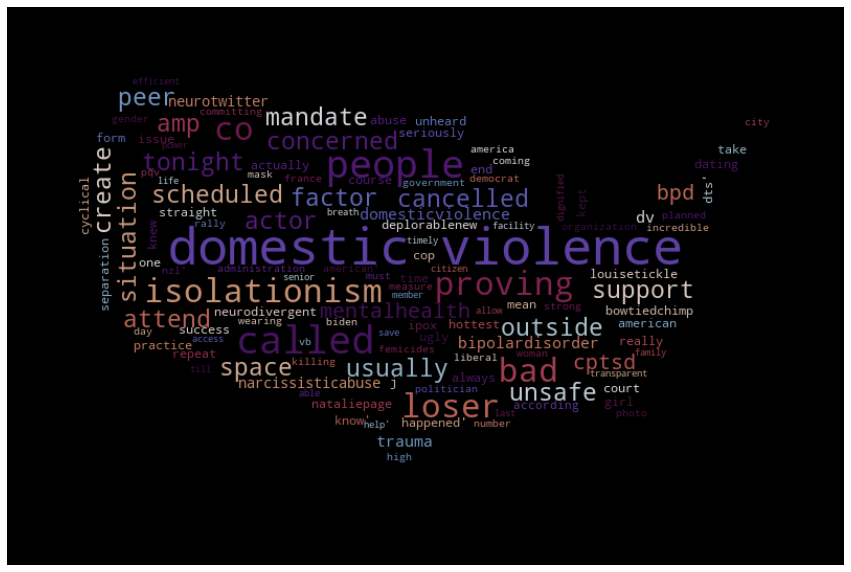

In [14]:
from PIL import Image
import os
from os import path,getcwd
image_mask = np.array(Image.open('USA MAP BLACK.png'))
d = os.getcwd()
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
text = tweets['clean-text_removed'].values
plt.figure(figsize=(15,15))
stopwords = set(STOPWORDS)
image_wc = WordCloud(background_color='black',max_words=250000,stopwords=stopwords,mask=image_mask,colormap='twilight_shifted')
image_wc.generate(str(text))
plt.imshow(image_wc,interpolation='bilinear')
plt.axis("off")
plt.show()

### Keyword Analysis

The goal was to understand presence of certain words and then define any correlation between these words and domestic violence.

In [15]:
keywords = ['Alcoholism','complications','Substance-related','disorders','complications',
            'Family relations','Spouse abuse','Substance abuse','Substance use', 'Intimate Partner Violence',
            'cycles of escalation','Duluth model', 'batterer intervention programs',
            'intimate partner violence','perpetrator','recidivism','intimidation','threats','physical violence',
            'sexual violence','isolation','economic abuse','stalking','psychological abuse',
            'coercion related to mental health']

In [16]:
import re
pattern = '|'.join(f"\\b{k}\\b" for k in keywords)  # Whole words only                                                      
matches = {k: 0 for k in keywords}
for title in tweets['Text']:
    for match in re.findall(pattern, title):
        matches[match] += 1
print(matches)

{'Alcoholism': 23, 'complications': 19, 'Substance-related': 0, 'disorders': 62, 'Family relations': 0, 'Spouse abuse': 0, 'Substance abuse': 11, 'Substance use': 2, 'Intimate Partner Violence': 36, 'cycles of escalation': 0, 'Duluth model': 4, 'batterer intervention programs': 0, 'intimate partner violence': 154, 'perpetrator': 460, 'recidivism': 9, 'intimidation': 59, 'threats': 263, 'physical violence': 148, 'sexual violence': 353, 'isolation': 131, 'economic abuse': 29, 'stalking': 576, 'psychological abuse': 59, 'coercion related to mental health': 0}


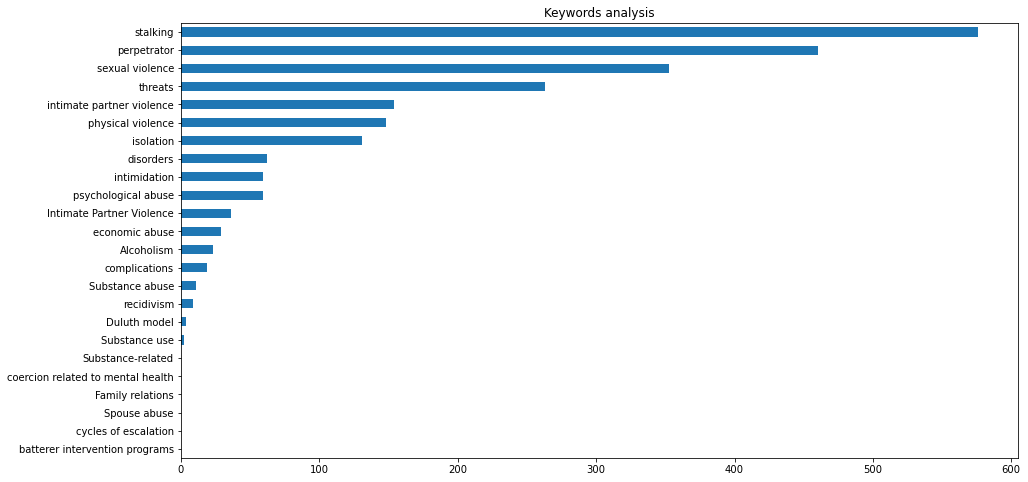

In [17]:
match = pd.DataFrame(matches,index=[0])
match.T.sort_values(0).plot(kind = 'barh',legend = False,
                            figsize = (15,8),title = 'Keywords analysis')
plt.show()

From the keyword analysis above we come to the following conclusion:<br>
* __Stalking__, __perpetrator__, __sexual violence__, __threats__, __intimate partner violence__ are some of the most used keywords that occur in *Domestic violence based tweets*
* While __Spouse abuse__, __Family relations__ and **Subtance related** the least
* From this keyword analysis we can say that **substance abuse** and **domestic violence** have a weak correlations

### User analysis

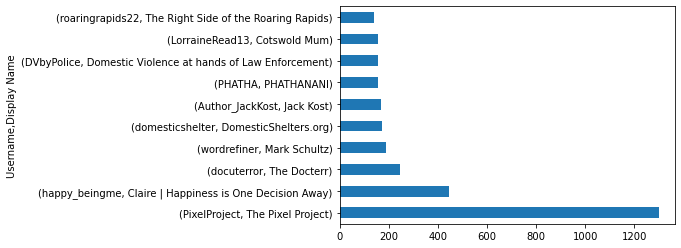

In [18]:
dv.groupby(['Username','Display Name'])['Text'].count().sort_values(ascending = False)[:10].plot(kind = 'barh')
plt.show()

The Top 10 usernames are mostly organizations that support victims of Domestic violence.


## __Topic Modeling__

* In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.<br> 
* Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. <br> 
* Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear approximately equally in both.<br> 
* A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words.<br> The "topics" produced by topic modeling techniques are clusters of similar words.<br> 
* A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is.<br>

* Topic models are also referred to as probabilistic topic models, which refers to statistical algorithms for discovering the latent semantic structures of an extensive text body.<br>
* In the age of information, the amount of the written material we encounter each day is simply beyond our processing capacity.<br> 
* Topic models can help to organize and offer insights for us to understand large collections of unstructured text bodies. <br> 
* Originally developed as a text-mining tool, topic models have been used to detect instructive structures in data such as genetic information, images, and networks. <br>

**Source: Wikipedia**

We use LDA based Topic modeling. 
LDA stands for __Latent Dirichlet Allocation__. <br>

* In natural language processing, the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. <br>
* For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model.

We import LDA from <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html">Sklearn</a>. Please click on the link for documentation

In [19]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5,random_state=42)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95,min_df=2,stop_words='english')
dtm = cv.fit_transform(tweets['clean-text_removed'])

In [21]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [22]:
for i,topic in enumerate(lda.components_):
    print(f"The top 15 words for the topic #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])

The top 15 words for the topic #0
['life', 'issue', 'case', 'child', 'like', 'rape', 'law', 'victim', 'abuse', 'people', 'men', 'amp', 'woman', 'domestic', 'violence']
The top 15 words for the topic #1
['covid', 'say', 'year', 'case', 'abuse', 'sexual', 'law', 'victim', 'child', 'new', 'amp', 'woman', 'http', 'domestic', 'violence']
The top 15 words for the topic #2
['family', 'woman', 'need', 'domesticabuse', 'amp', 'survivor', 'day', 'victim', 'support', 'abuse', 'help', 'domesticviolence', 'domestic', 'violence', 'http']
The top 15 words for the topic #3
['arrest', 'mass', 'charged', 'suspect', 'home', 'shooting', 'police', 'arrested', 'history', 'bail', 'charge', 'gun', 'http', 'violence', 'domestic']
The top 15 words for the topic #4
['police', 'men', 'charge', 'know', 'arrested', 'people', 'man', 'amp', 'victim', 'wife', 'like', 'woman', 'http', 'domestic', 'violence']


In [23]:
topic_results = lda.transform(dtm)

In [24]:
tweets['topic_result_lda'] = topic_results.argmax(axis = 1)
tweets.sample(5)

Datetime  \
33711  2021-12-28 11:25:22+00:00   
95614  2021-11-22 23:57:41+00:00   
62050  2021-12-09 19:26:19+00:00   
13250  2022-01-12 15:36:18+00:00   
66691  2021-12-07 08:55:15+00:00   

                                                    Text  \
33711  don't look like much, I know, but that's on do...   
95614  @shannonrwatts Domestic violence is violence A...   
62050  From wanting to help, to giving back this Chri...   
13250  mexicans love x cuz they still justify domesti...   
66691     Domestic violence... 😳 https://t.co/bIno8IRtoO   

                                            text_cleaned  \
33711  don t look like much i know but that s on dome...   
95614  shannonrwatts domestic violence is violence an...   
62050  from wanting to help to giving back this chris...   
13250  mexicans love x cuz they still justify domesti...   
66691            domestic violence https t co bino irtoo   

                                      clean-text_removed  topic_result_lda  
33711  look like much know domestic violence fight ma...                 4  
95614  shannonrwatts domestic violence violence need ...                 0  
62050  wanting help giving back christmas super snugg...                 2  
13250  mexican love x cuz still justify domestic viol...                 4  
66691               domestic violence http co bino irtoo                 1

In [44]:
topic_mapping = {4:'Discussion',1:'News',3:'Campaign and Law',2:'Help and services',0:'Arrests & Court Cases'}

In [45]:
tweets['topic'] = tweets.topic_result_lda.map(topic_mapping)

In [39]:
tweets.sample(5)

Datetime  \
97898  2021-11-22 07:45:44+00:00   
72811  2021-12-03 13:23:45+00:00   
46548  2021-12-20 08:27:56+00:00   
28028  2022-01-01 17:19:59+00:00   
87335  2021-11-26 01:42:50+00:00   

                                                    Text  \
97898  @ChiromoHospGrp @StepupTogether @joymilele @An...   
72811  "Ms. Isakov’s openness has been “very effectiv...   
46548  #Guardian - #PopeFrancis says domestic violenc...   
28028  @JeremiahTam Na wa o. \n\nI just dislike heari...   
87335  @idiotsandpries1 @Clodoformox Should be some s...   

                                            text_cleaned  \
97898  chiromohospgrp stepuptogether joymilele anjias...   
72811  ms isakov s openness has been very effective i...   
46548  guardian popefrancis says domestic violence ag...   
28028  jeremiahtam na wa o i just dislike hearing any...   
87335  idiotsandpries clodoformox should be some sort...   

                                      clean-text_removed  topic_result_lda  \
97898  chiromohospgrp stepuptogether joymilele anjias...                 0   
72811  m isakov openness effective decreasing rate se...                 1   
46548  guardian popefrancis say domestic violence wom...                 1   
28028  jeremiahtam na wa dislike hearing anything inv...                 4   
87335  idiotsandpries clodoformox sort insanity defen...                 4   

                       topic  
97898  Arrests & Court Cases  
72811      Help and services  
46548      Help and services  
28028             Discussion  
87335             Discussion

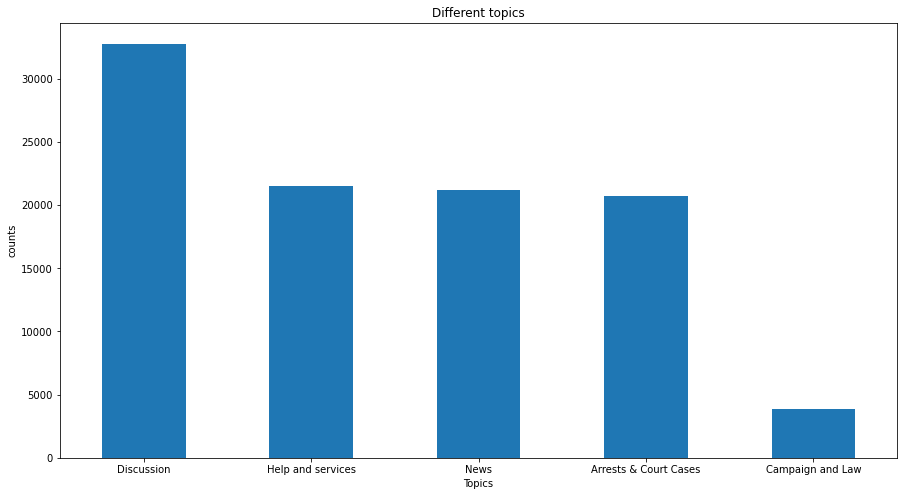

In [46]:
plt.figure(figsize=(15,8))
tweets.topic.value_counts().plot(kind = 'bar')
plt.xlabel('Topics')
plt.ylabel('counts')
plt.title('Different topics')
plt.xticks(rotation = 0)
plt.show()

Conclusion from topic modeling: <br>
* Most of the Domestic violence tweets are Discussion based tweets
* Second most tweets are related to the topic Help and services
* Then there are news related topics
* Then there are Arrest & court Cases based topics and finally Campaign and Law based 

# __Week 2: Substance Abuse__

In [ ]:
We follow similar steps and do the same procedure and scrape tweets as we did for domestic violence 

In [47]:
sa = pd.read_csv('substance abuse_week2.csv',lineterminator='\n')
sa.sample(5)

Unnamed: 0                   Datetime      Tweet Id  \
57938      57937  2021-07-31 23:39:09+00:00  1.421620e+18   
70964      70963  2021-06-21 12:29:12+00:00  1.406950e+18   
40445      40444  2021-09-25 13:21:39+00:00  1.441750e+18   
94918      94916  2021-04-08 20:57:37+00:00  1.380260e+18   
89141      89139  2021-04-23 06:20:48+00:00  1.385480e+18   

                                                    Text         Username  \
57938  FMCSA needs to do this. One joint after nearly...   NorthernGrasse   
70964  Genes responsible for and Genetic heritability...  ThunderBearFire   
40445  Disorders such as depression and bipolar disor...       atheistsHH   
94918  One year after the US locked down in an attemp...    DoubleFortePR   
89141  We know "The War on Drugs" isn't working and w...  addictionquoter   

       Like Count                  Display Name Language\r  
57938         1.0         St. Lawrence Cannabis       en\r  
70964         3.0                  Thunder Bear       en\r  
40445         0.0              AthetistsHelping       en\r  
94918         0.0               Double Forte PR       en\r  
89141         0.0  Recovery Quotes (aka Jackie)       en\r

In [48]:
tweets = sa.loc[:,['Datetime','Text']]

In [49]:
tweets['text_cleaned'] = tweets['Text'].apply(tweet_cleaner)
tweets.head()

Datetime  \
0  2022-01-19 23:52:33+00:00   
1  2022-01-19 23:46:54+00:00   
2  2022-01-19 23:40:54+00:00   
3  2022-01-19 23:40:10+00:00   
4  2022-01-19 23:39:46+00:00   

                                                Text  \
0  @queer_spice “kids are resilient” is what abus...   
1  “Devin’s also been in active recovery”\n\nWe’r...   
2  Donald Trump has dementia and substance abuse ...   
3  This country already has a massive problem wit...   
4  @DonaldJTrumpJr Trump has dementia and substan...   

                                        text_cleaned  
0  queer spice kids are resilient is what abusers...  
1  devin s also been in active recovery we re not...  
2  donald trump has dementia and substance abuse ...  
3  this country already has a massive problem wit...  
4  donaldjtrumpjr trump has dementia and substanc...

In [53]:
tweets['clean-text_removed'] = tweets['text_cleaned'].apply(Refine)
tweets.head()

Datetime  \
0  2022-01-19 23:52:33+00:00   
1  2022-01-19 23:46:54+00:00   
2  2022-01-19 23:40:54+00:00   
3  2022-01-19 23:40:10+00:00   
4  2022-01-19 23:39:46+00:00   

                                                Text  \
0  @queer_spice “kids are resilient” is what abus...   
1  “Devin’s also been in active recovery”\n\nWe’r...   
2  Donald Trump has dementia and substance abuse ...   
3  This country already has a massive problem wit...   
4  @DonaldJTrumpJr Trump has dementia and substan...   

                                        text_cleaned  \
0  queer spice kids are resilient is what abusers...   
1  devin s also been in active recovery we re not...   
2  donald trump has dementia and substance abuse ...   
3  this country already has a massive problem wit...   
4  donaldjtrumpjr trump has dementia and substanc...   

                                  clean-text_removed  
0  queer spice kid resilient abuser say justify n...  
1  devin also active recovery talking drug substa...  
2  donald trump dementia substance abuse issue in...  
3  country already massive problem substance abus...  
4  donaldjtrumpjr trump dementia substance abuse ...

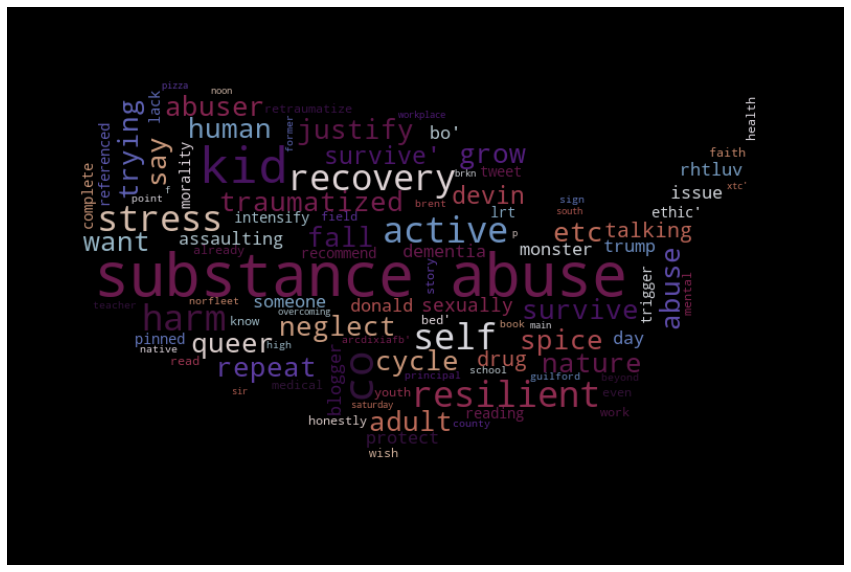

In [54]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
image_mask = np.array(Image.open('USA MAP BLACK.png'))
text = tweets['clean-text_removed'].values
plt.figure(figsize=(15,15))
stopwords = set(STOPWORDS)
image_wc = WordCloud(background_color='black',max_words=250000,stopwords=stopwords,mask=image_mask,colormap='twilight_shifted')
image_wc.generate(str(text))
plt.imshow(image_wc,interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
keywords = ['Alcoholism','complications','Domestic abuse','disorders','complications',
            'Family relations','Spouse abuse','domestic violence','Domestic Violence', 'Intimate Partner Violence',
            'intimate partner violence','perpetrator','recidivism','intimidation','threats','physical violence',
            'sexual violence','isolation','stalking','psychological abuse',
            'mental health']

In [56]:
import re
pattern = '|'.join(f"\\b{k}\\b" for k in keywords)  # Whole words only                                                      
matches = {k: 0 for k in keywords}
for title in tweets['Text']:
    for match in re.findall(pattern, title):
        matches[match] += 1
print(matches)

{'Alcoholism': 195, 'complications': 63, 'Domestic abuse': 28, 'disorders': 2670, 'Family relations': 0, 'Spouse abuse': 0, 'domestic violence': 837, 'Domestic Violence': 102, 'Intimate Partner Violence': 4, 'intimate partner violence': 33, 'perpetrator': 14, 'recidivism': 42, 'intimidation': 4, 'threats': 42, 'physical violence': 13, 'sexual violence': 41, 'isolation': 346, 'stalking': 32, 'psychological abuse': 14, 'mental health': 9967}


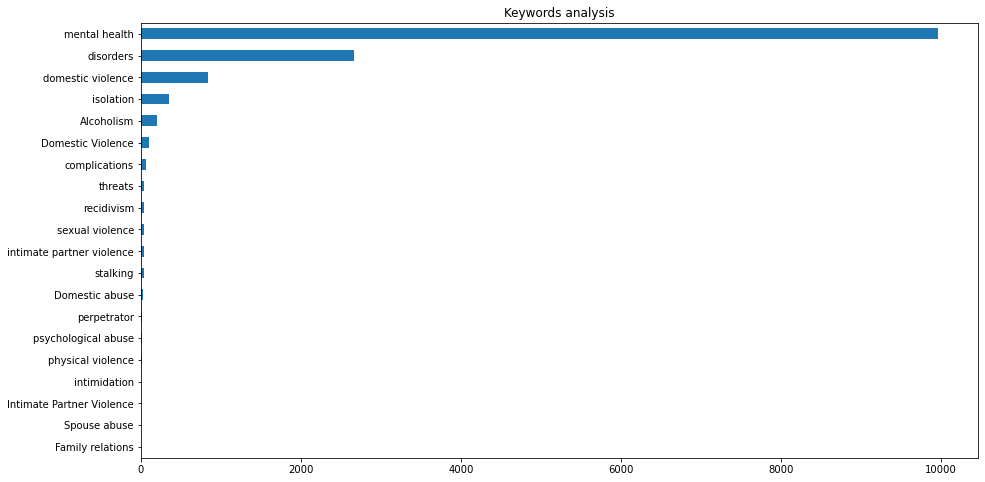

In [57]:
match = pd.DataFrame(matches,index=[0])
match.T.sort_values(0).plot(kind = 'barh',legend = False,
                            figsize = (15,8),title = 'Keywords analysis')
plt.show()

From this figure above we come to the following conclusion:<br>
* __Mental health__, __disorders__, __domestic violence__ are the most used keywords along with __Substance Abuse__
* __Family relations__, __Spouse abuse__, and __Intimate partner Violence__ the least.

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5,random_state=42)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95,min_df=2,stop_words='english')
dtm = cv.fit_transform(tweets['clean-text_removed'])

In [59]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [60]:
for i,topic in enumerate(lda.components_):
    print(f"The top 15 words for the topic #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])

The top 15 words for the topic #0
['mentalhealthawareness', 'patient', 'facility', 'center', 'amp', 'addiction', 'help', 'family', 'new', 'recovery', 'therapy', 'program', 'substanceabuse', 'treatment', 'http']
The top 15 words for the topic #1
['learn', 'use', 'awareness', 'free', 'recovery', 'community', 'disorder', 'youth', 'substanceabuse', 'help', 'prevention', 'addiction', 'drug', 'amp', 'http']
The top 15 words for the topic #2
['community', 'people', 'recovery', 'depression', 'covid', 'help', 'illness', 'suicide', 'disorder', 'service', 'issue', 'amp', 'http', 'mental', 'health']
The top 15 words for the topic #3
['family', 'really', 'make', 'addiction', 'thing', 'year', 'time', 'think', 'know', 'life', 'amp', 'problem', 'like', 'issue', 'people']
The top 15 words for the topic #4
['housing', 'use', 'homelessness', 'crime', 'mental', 'policy', 'street', 'amp', 'need', 'issue', 'homeless', 'http', 'problem', 'people', 'drug']


In [61]:
topic_results = lda.transform(dtm)

In [62]:
tweets['topic_result_lda'] = topic_results.argmax(axis = 1)
tweets.sample(5)

Datetime  \
93427  2021-04-11 18:40:03+00:00   
76310  2021-06-03 18:03:02+00:00   
69797  2021-06-24 18:50:02+00:00   
23477  2021-11-14 04:56:35+00:00   
78577  2021-05-27 07:32:44+00:00   

                                                    Text  \
93427  @BobPfalzgraf @RussCote @BadLegalTakes @BadHip...   
76310  " About half of people with a mental health di...   
69797  @quak_quak Omar has also publicly demonstrated...   
23477  @Penny_Squeezer I already have a list if local...   
78577  In 2015 I started a Non- Profit Human Rights O...   

                                            text_cleaned  \
93427  bobpfalzgraf russcote badlegaltakes badhippa c...   
76310  about half of people with a mental health diag...   
69797  quak quak omar has also publicly demonstrated ...   
23477  penny squeezer i already have a list if local ...   
78577  in i started a non profit human rights organis...   

                                      clean-text_removed  topic_result_lda  
93427  bobpfalzgraf russcote badlegaltakes badhippa c...                 3  
76310  half people mental health diagnosis also affec...                 2  
69797  quak quak omar also publicly demonstrated inst...                 0  
23477  penny squeezer already list local orgs helped ...                 2  
78577  started non profit human right organisation ca...                 3

In [63]:
topic_mapping = {0:'Discussion',1:'Causes and effects',2:'Treatment and Remedies',3:'Awareness',4:'News'}

In [64]:
tweets['topic'] = tweets.topic_result_lda.map(topic_mapping)

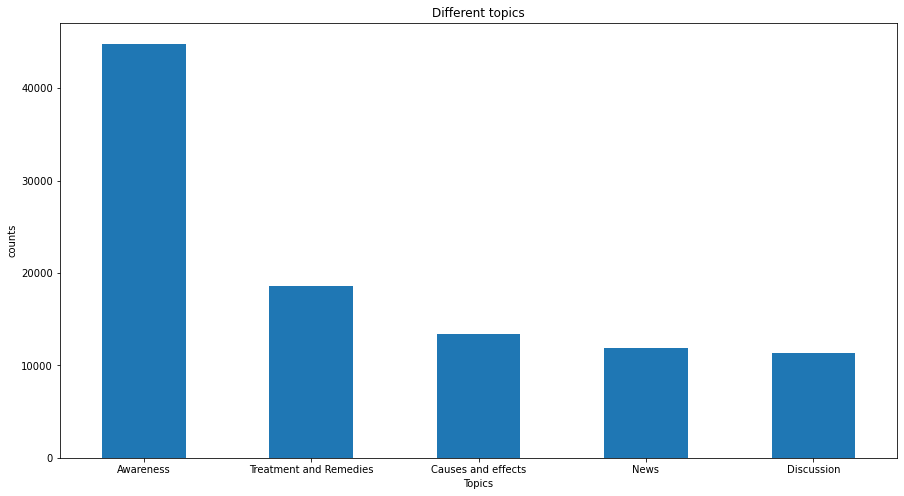

In [65]:
plt.figure(figsize=(15,8))
tweets.topic.value_counts().plot(kind = 'bar')
plt.xlabel('Topics')
plt.ylabel('counts')
plt.title('Different topics')
plt.xticks(rotation = 0)
plt.show()

Conclusion from topic modeling: <br>
* Most of the Substance abuse tweets are Awareness based tweets
* Second most tweets are related to the topic Treatment and Remedies
* Then there are causes and effect related topics
* Then there are News based topics and finally Campaign and Law based 

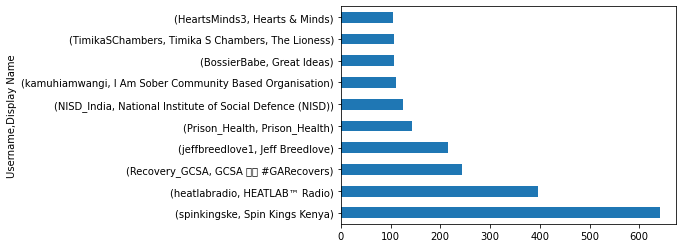

In [68]:
sa.groupby(['Username','Display Name'])['Text'].count().sort_values(ascending = False)[:10].plot(kind = 'barh')
plt.show()

The Top 10 usernames are mostly organizations that support victims of Substance abuse

__Week 3__

__Scrape data for keyword substance abuse using snscrape__

The chunks below show dummy code for how to scrape using snscrape

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('substance abuse since:2021-01-01 until:2021-03-25').get_items()):
    if i>50:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_dfdummy = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('substance abuse since:2021-01-01 until:2021-03-25').get_items()):
    if i>50000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])

__Scrape data for keyword domestic violence using snsscrape__

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas

# Creating list to append tweet data to
tweets_list7 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('domestic violence since:2021-01-01 until:2021-11-21').get_items()):
    if i>200000:
        break
    tweets_list7.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_df7 = pd.DataFrame(tweets_list7, columns=['Datetime', 'Tweet Id', 'Text'])

In [ ]:
# After merging all the files create a csv file and load to the local computer and reload the files

__Read the dataframe and inspect__

In [69]:
sa = pd.read_csv('Substance abuse final.csv',lineterminator='\n')
dv = pd.read_csv('Domestic violence final.csv')

In [4]:
sa = pd.read_csv('Substance abuse final.csv',lineterminator='\n')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
sa['Datetime'] = pd.to_datetime(sa['Datetime'])

__Check for datatypes__

In [6]:
sa.dtypes

Unnamed: 0     object
Datetime       object
Tweet Id      float64
Text           object
Date\r         object
dtype: object

__Inspect first few columns__

In [56]:
sa.head()

Unnamed: 0                   Datetime             Tweet Id  \
0           0  2022-01-19 23:52:33+00:00  1483950538391752704   
1           1  2022-01-19 23:46:54+00:00  1483949118095515650   
2           2  2022-01-19 23:40:54+00:00  1483947606418018314   
3           3  2022-01-19 23:40:10+00:00  1483947423097851908   
4           4  2022-01-19 23:39:46+00:00  1483947320005771264   

                                                Text        Date  
0  @queer_spice “kids are resilient” is what abus...  2022-01-19  
1  “Devin’s also been in active recovery”\n\nWe’r...  2022-01-19  
2  Donald Trump has dementia and substance abuse ...  2022-01-19  
3  This country already has a massive problem wit...  2022-01-19  
4  @DonaldJTrumpJr Trump has dementia and substan...  2022-01-19

In [57]:
dv.head()

Unnamed: 0                   Datetime      Tweet Id  \
0          0  2022-01-19 23:59:09+00:00  1.483952e+18   
1          1  2022-01-19 23:58:31+00:00  1.483952e+18   
2          2  2022-01-19 23:55:30+00:00  1.483951e+18   
3          3  2022-01-19 23:53:16+00:00  1.483951e+18   
4          4  2022-01-19 23:53:09+00:00  1.483951e+18   

                                                Text        date  
0  Tonight outside factors mandate the usually sc...  2022-01-19  
1  @NataliePage31 @louisetickle Who has actually ...  2022-01-19  
2  @BowTiedChimp It's really bad.  One of the "ho...  2022-01-19  
3  @LOCthedreamer1 @MariaLaoise Most women here s...  2022-01-19  
4  ‘STOP THE CAP!’ Pardi Says There’s No Breakup ...  2022-01-19

__Select only relevant columns__

In [61]:
dv_df = dv.loc[:,['date','Text']]
sa_df = sa.loc[:,['Date','Text']]

In [62]:

sa_df.head()

Date                                               Text
0  2022-01-19  @queer_spice “kids are resilient” is what abus...
1  2022-01-19  “Devin’s also been in active recovery”\n\nWe’r...
2  2022-01-19  Donald Trump has dementia and substance abuse ...
3  2022-01-19  This country already has a massive problem wit...
4  2022-01-19  @DonaldJTrumpJr Trump has dementia and substan...

In [63]:
dv_df.head()

date                                               Text
0  2022-01-19  Tonight outside factors mandate the usually sc...
1  2022-01-19  @NataliePage31 @louisetickle Who has actually ...
2  2022-01-19  @BowTiedChimp It's really bad.  One of the "ho...
3  2022-01-19  @LOCthedreamer1 @MariaLaoise Most women here s...
4  2022-01-19  ‘STOP THE CAP!’ Pardi Says There’s No Breakup ...

__Data Preprocessing__

In [65]:
dv_df['text_cleaned'] = dv_df['Text'].apply(tweet_cleaner)

sa_df['text_cleaned'] = sa_df['Text'].apply(tweet_cleaner)


In [66]:
dv_df.head(1)

date                                               Text  \
0  2022-01-19  Tonight outside factors mandate the usually sc...   

                                        text_cleaned  
0  tonight outside factors mandate the usually sc...

In [67]:
sa_df.head(1)

Date                                               Text  \
0  2022-01-19  @queer_spice “kids are resilient” is what abus...   

                                        text_cleaned  
0  queer spice kids are resilient is what abusers...

__More Data cleaning__

In [ ]:
dv_df['clean-text_removed'] = dv_df['text_cleaned'].apply(Refine)
sa_df['clean-text_removed'] = sa_df['text_cleaned'].apply(Refine)

In [69]:
sa_df.head()

Date                                               Text  \
0  2022-01-19  @queer_spice “kids are resilient” is what abus...   
1  2022-01-19  “Devin’s also been in active recovery”\n\nWe’r...   
2  2022-01-19  Donald Trump has dementia and substance abuse ...   
3  2022-01-19  This country already has a massive problem wit...   
4  2022-01-19  @DonaldJTrumpJr Trump has dementia and substan...   

                                        text_cleaned  \
0  queer spice kids are resilient is what abusers...   
1  devin s also been in active recovery we re not...   
2  donald trump has dementia and substance abuse ...   
3  this country already has a massive problem wit...   
4  donaldjtrumpjr trump has dementia and substanc...   

                                  clean-text_removed  
0  queer spice kid resilient abuser say justify n...  
1  devin also active recovery talking drug substa...  
2  donald trump dementia substance abuse issue in...  
3  country already massive problem substance abus...  
4  donaldjtrumpjr trump dementia substance abuse ...

In [70]:
dv_df.head()

date                                               Text  \
0  2022-01-19  Tonight outside factors mandate the usually sc...   
1  2022-01-19  @NataliePage31 @louisetickle Who has actually ...   
2  2022-01-19  @BowTiedChimp It's really bad.  One of the "ho...   
3  2022-01-19  @LOCthedreamer1 @MariaLaoise Most women here s...   
4  2022-01-19  ‘STOP THE CAP!’ Pardi Says There’s No Breakup ...   

                                        text_cleaned  \
0  tonight outside factors mandate the usually sc...   
1  nataliepage louisetickle who has actually had ...   
2  bowtiedchimp it s really bad one of the hottes...   
3  locthedreamer marialaoise most women here suff...   
4  stop the cap pardi says there s no breakup wit...   

                                  clean-text_removed  
0  tonight outside factor mandate usually schedul...  
1  nataliepage louisetickle actually success prov...  
2  bowtiedchimp really bad one hottest girl ever ...  
3  locthedreamer marialaoise woman suffer hand me...  
4  stop cap pardi say breakup megan thee stallion...

__Word cloud__

__Word cloud for Domestic violence__

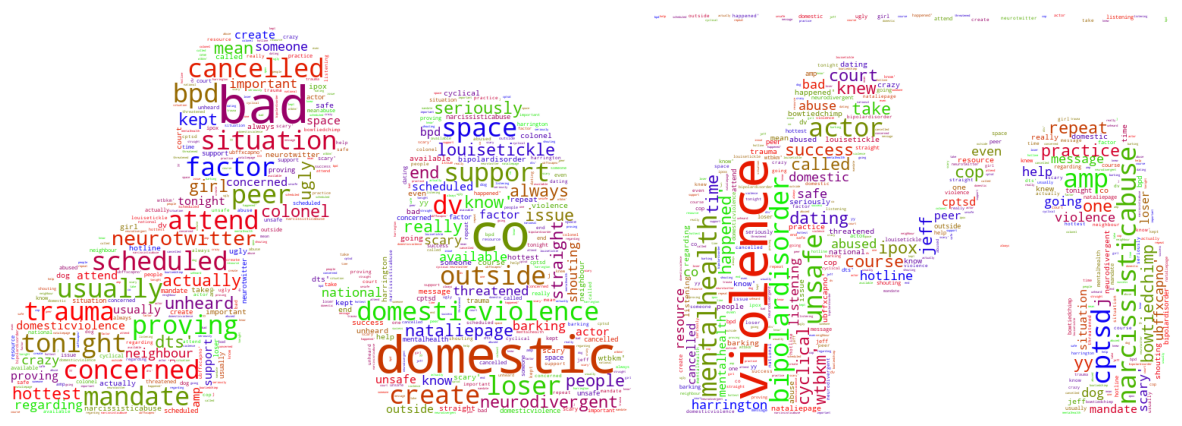

In [149]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
image_colors = ImageColorGenerator(image_mask)
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
image_mask = np.array(Image.open('Publication1-2.jpeg').convert("L"))
text = dv_df['clean-text_removed'].values
wc_dv = WordCloud(stopwords=STOPWORDS, 
                        background_color="white", 
                        mode="RGBA", 
                        max_words=10000, 
                        #contour_width=3, 
                        repeat=True,
                        mask=image_mask,
                        colormap='brg')
wc_dv.generate(str(text))
#wc_dv.recolor(color_func = image_colors)
plt.figure(figsize=(15,15))
plt.imshow(wc_dv)
plt.axis("off")
plt.show()

__Word cloud for Substance abuse__

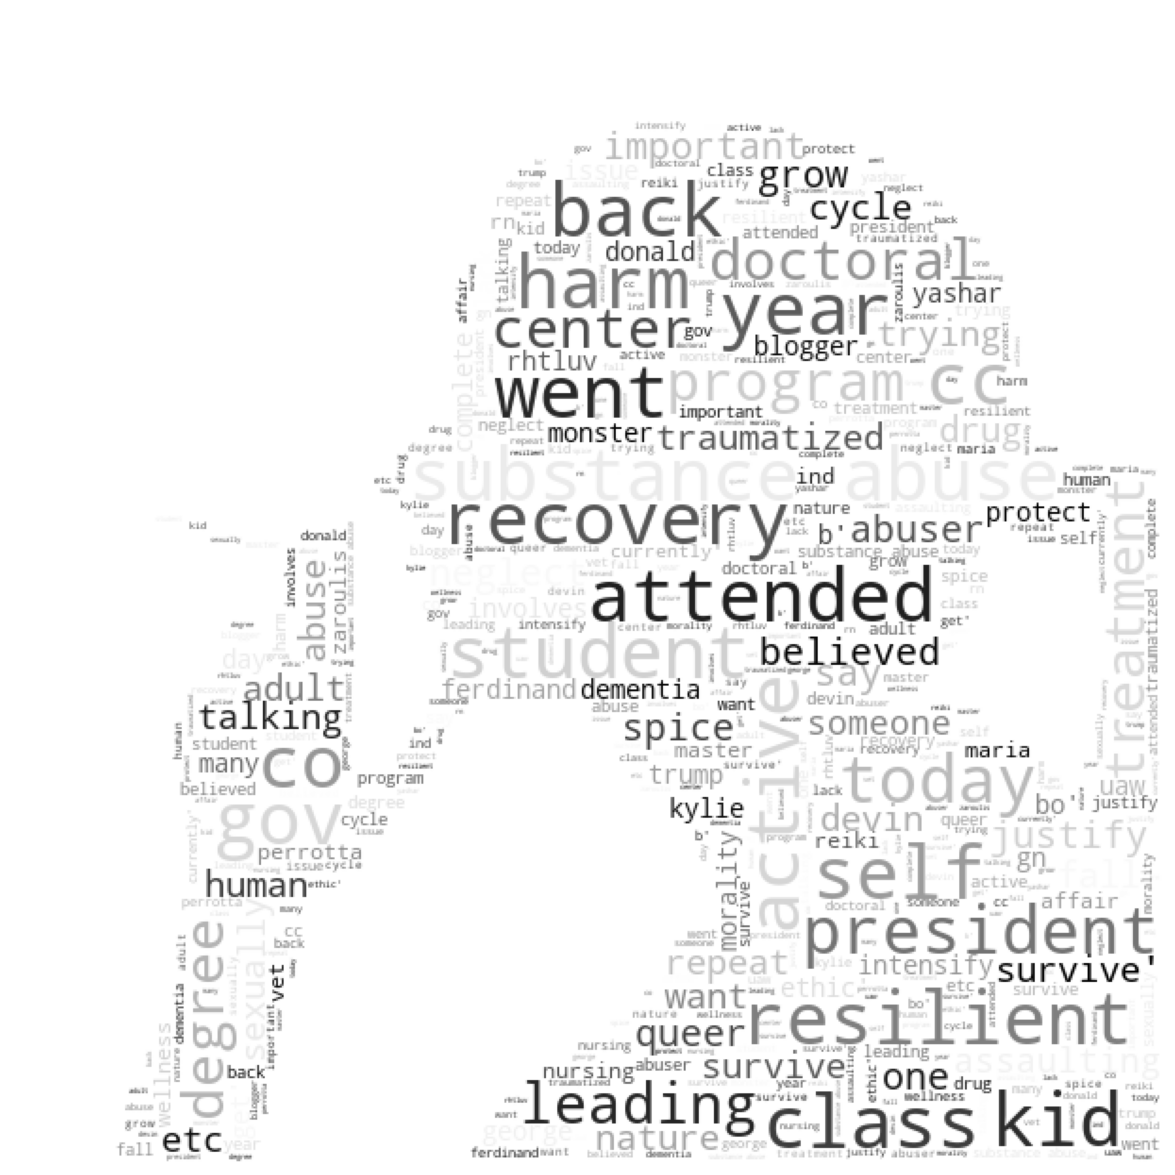

In [147]:
from PIL import Image
image_mask = np.array(Image.open('sa.jpeg'))
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
image_colors = ImageColorGenerator(image_mask)
text = sa_df['clean-text_removed'].values
wc_dv = WordCloud(stopwords=STOPWORDS, 
                        background_color="white", 
                        mode="RGBA", 
                        max_words=100000, 
                        #contour_width=3, 
                        repeat=True,
                        mask=image_mask,
                        colormap='gist_yarg')
wc_dv.generate(str(text))
plt.figure(figsize=(15,15))
plt.imshow(wc_dv)
plt.axis("off")
plt.savefig('sv.png')
plt.show()


**What are n-grams?** <br>
N-grams are continuous sequences of words or symbols or tokens in a document. <br>
In technical terms, they can be defined as the neighbouring sequences of items in a document. <br>
They come into play when we deal with text data in NLP(Natural Language Processing) tasks.<br>

| **n**   |     **Term**      |  
|-------------|-------------|
| 1 |  Unigram | 
| 2 |  Bigram|
| 3| Trigram|
| n| n-gram|


| **Example**   |     **Type of ngram**      |  
|-------------|-------------|
| ['I','stay' 'in' 'Atlanta'] |  Unigram | 
| ['I stay','stay in','in Atlanta] |  Bigram|
| ['I'stay in'], ['stay in Atlanta]| Trigram|

**Source**: _Analytics vidhya_





__Ngrams__

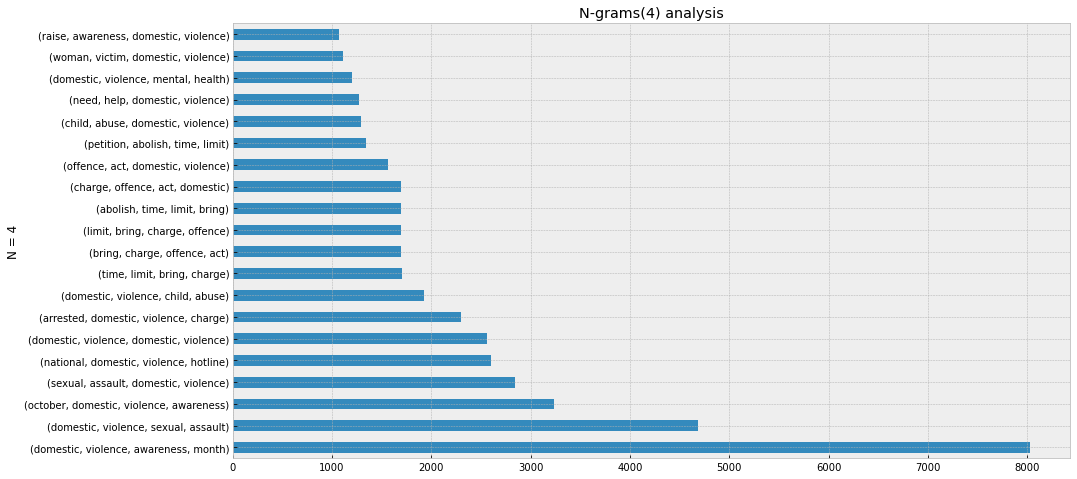

In [86]:
#dv
plt.style.use('bmh')
import re
import nltk
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = text.lower()
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]
words =  basic_clean(''.join(str(dv_df['Text'].tolist())))
plt.figure(figsize=(15,8))
pd.Series(nltk.ngrams(words, 4)).value_counts()[:20].plot(kind = 'barh')
plt.ylabel('N = 4')
plt.title('N-grams(4) analysis')
plt.show()

The words that occur most with domestic violence are __awareness__, __month__, __sexual__,__assault__

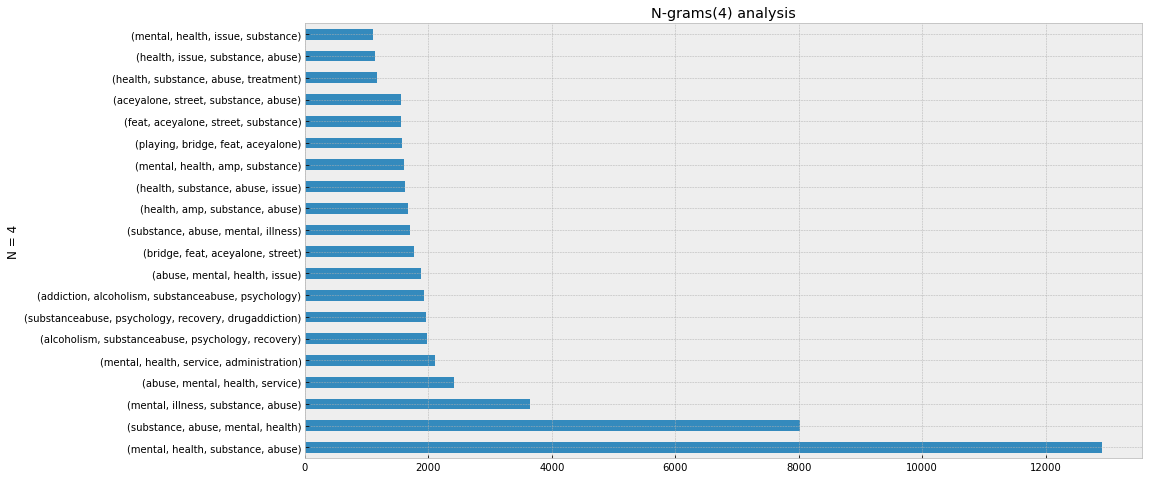

In [87]:
words =  basic_clean(''.join(str(sa_df['Text'].tolist())))
plt.figure(figsize=(15,8))
pd.Series(nltk.ngrams(words, 4)).value_counts()[:20].plot(kind = 'barh')
plt.ylabel('N = 4')
plt.title('N-grams(4) analysis')
plt.show()

Since we wanted to understand the relation between substance abuse and domestic violence we just passed those keywords to check for their frequency count

In [89]:
keywords = ['domestic violence','substance abuse','abuse']
import re
pattern = '|'.join(f"\\b{k}\\b" for k in keywords)  # Whole words only                                                      
matches = {k: 0 for k in keywords}
for title in dv_df['Text']:
    for match in re.findall(pattern, str(title)):
        matches[match] += 1
print(matches)

{'domestic violence': 485248, 'substance abuse': 1245, 'abuse': 56573}


In [90]:
keywords = ['domestic violence','substance abuse','violence']
import re
pattern = '|'.join(f"\\b{k}\\b" for k in keywords)  # Whole words only                                                      
matches = {k: 0 for k in keywords}
for title in sa_df['Text']:
    for match in re.findall(pattern, str(title)):
        matches[match] += 1
print(matches)

{'domestic violence': 3878, 'substance abuse': 280055, 'violence': 5953}


# __Week 3__

## Time Series

**What Is a Time Series?** <br>
* A time series is a sequence of data points that occur in successive order over some period of time. 
* This can be contrasted with cross-sectional data, which captures a point-in-time.

* In investing, a time series tracks the movement of the chosen data points, such as a security’s price, over a specified period of time with data points recorded at regular intervals. 
* There is no minimum or maximum amount of time that must be included, allowing the data to be gathered in a way that provides the information being sought by the investor or analyst examining the activity.

__KEY TAKEAWAYS__ <br>
* A time series is a data set that tracks a sample over time.
* In particular, a time series allows one to see what factors influence certain variables from period to period.
* Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.
* Forecasting methods using time series are used in both fundamental and technical analysis.
* Although cross-sectional data is seen as the opposite of time series, the two are often used together in practice.

**Source:** _Investopedia_

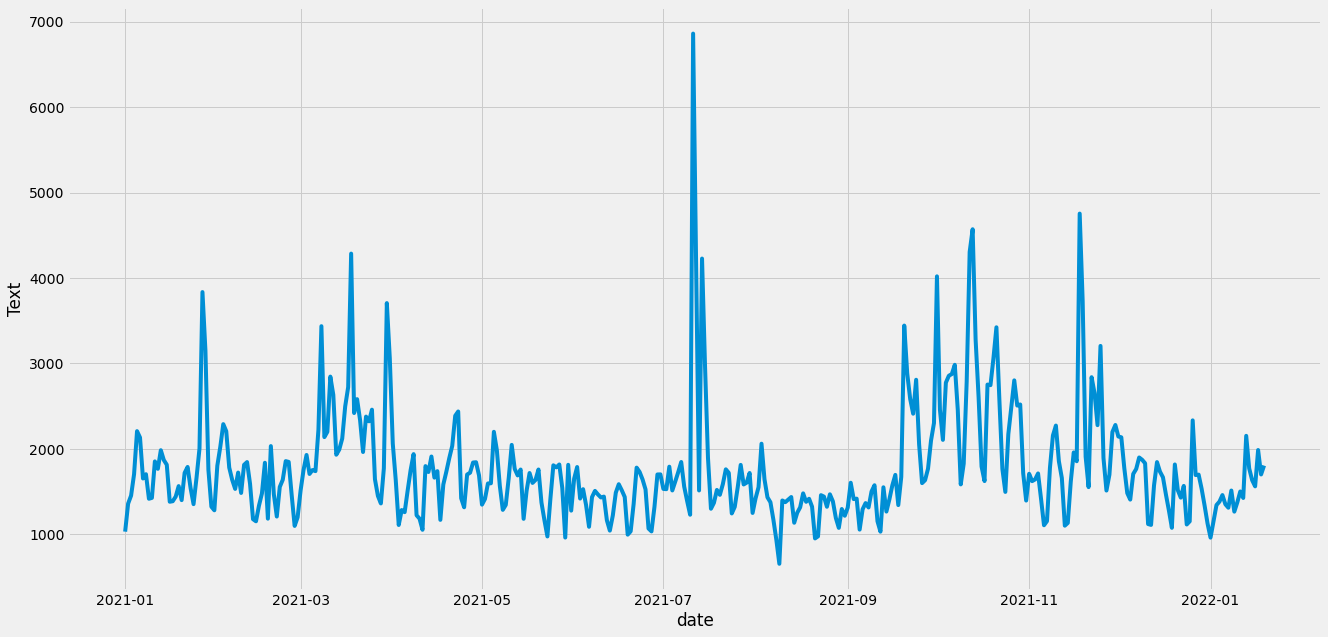

In [95]:
dv_df['date'] = pd.to_datetime(dv_df['date'] )
df_dv_ts = dv_df.groupby('date')['Text'].count().reset_index()
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,10))
sns.lineplot(x = 'date',y = "Text",data =df_dv_ts )
plt.show()

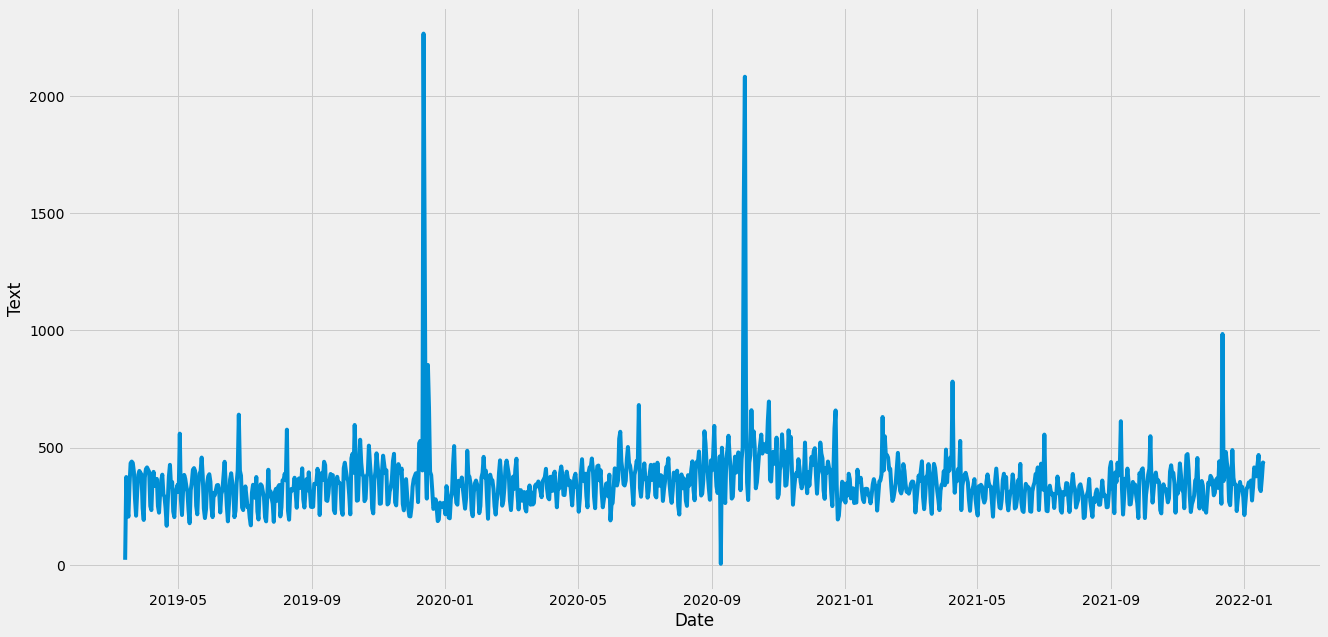

In [97]:
sa_df['Date'] = pd.to_datetime(sa_df['Date'] )
sa_df_ts = sa_df.groupby('Date')['Text'].count().reset_index()
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,10))
sns.lineplot(x = 'Date',y = "Text",data =sa_df_ts )
plt.show()

In [109]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from datetime import datetime

In [99]:
df2021 =sa_df_ts[sa_df_ts['Date'] > '2020-12-31']

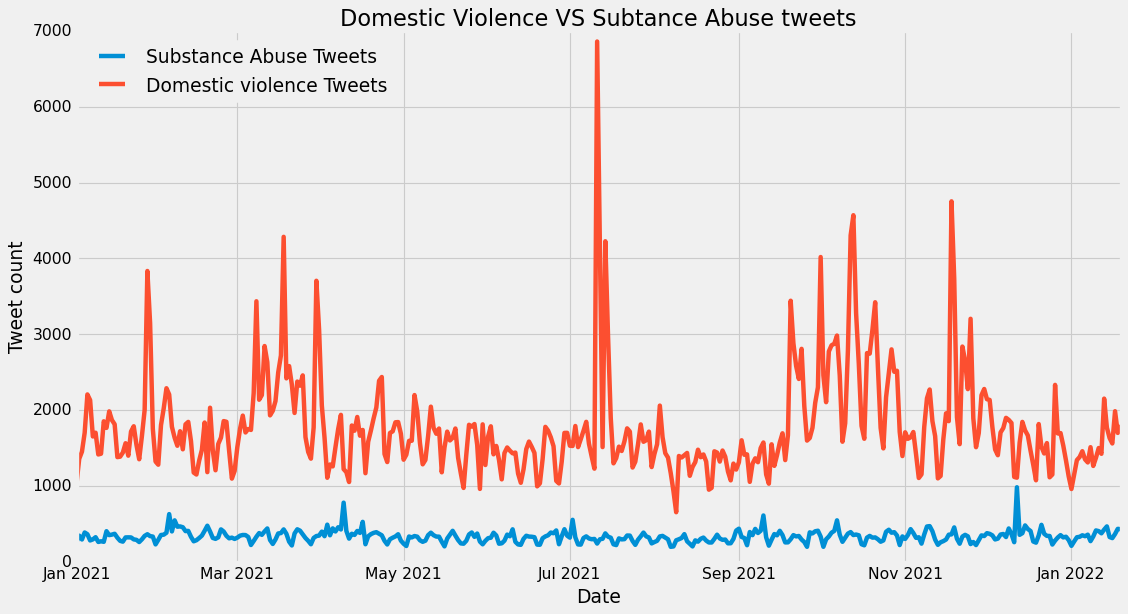

In [125]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
ax1 = sns.lineplot(x = 'Date',y = 'Text',data = df2021,label = 'Substance Abuse Tweets')
ax2 = sns.lineplot(x = 'date',y = 'Text',data = df_dv_ts, label  = 'Domestic violence Tweets')
legend = ax1.legend(loc='upper left')
plt.ylabel('Tweet count')
plt.title('Domestic Violence VS Subtance Abuse tweets')
plt.show()

## Fbprophet

__What is Prophet?__ <br>
* “Prophet” is an open-sourced library available on R or Python which helps users analyze and forecast time-series values released in 2017. 
* With developers’ great efforts to make the time-series data analysis be available without expert works, it is highly user-friendly but still highly customizable, even to non-expert users.

The Prophet Forecasting Model
We use a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:

                y(t) = g(t) + s(t) + h(t) + εt

* g(t): piecewise linear or logistic growth curve for modelling non-periodic changes in time series
* s(t): periodic changes (e.g. weekly/yearly seasonality)
* h(t): effects of holidays (user provided) with irregular schedules
* εt: error term accounts for any unusual changes not accommodated by the model

* Using time as a regressor, Prophet is trying to fit several linear and non linear functions of time as components. 
* Modeling seasonality as an additive component is the same approach taken by exponential smoothing in Holt-Winters technique . 
* We are, in effect, framing the forecasting problem as a curve-fitting exercise rather than looking explicitly at the time based dependence of each observation within a time series.

In [126]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [127]:
df1 = sa_df_ts.rename(columns={'Date': 'ds',
                        'Text': 'y'})

df1.head()

ds    y
0 2019-03-14   22
1 2019-03-15  375
2 2019-03-16  241
3 2019-03-17  206
4 2019-03-18  343

In [129]:
df2 = df_dv_ts.rename(columns={'date': 'ds',
                        'Text': 'y'})

df2.head()

ds     y
0 2021-01-01  1032
1 2021-01-02  1360
2 2021-01-03  1454
3 2021-01-04  1704
4 2021-01-05  2208

__Substance abuse__

In [136]:
my_model = Prophet(interval_width=0.95,daily_seasonality = True)

In [137]:
my_model.fit(df1)

Initial log joint probability = -6.64725


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2636.13     0.0075882       373.047      0.5086           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       2636.87   0.000111619       151.297   1.009e-06       0.001      265  LS failed, Hessian reset 
     199       2637.25    0.00497982         194.5           1           1      321   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       2637.26   8.37312e-05        111.01   4.305e-07       0.001      360  LS failed, Hessian reset 
     238       2637.29    2.5614e-05       67.2882   3.018e-07       0.001      454  LS failed, Hessian reset 
     273       2637.29   3.57335e-07        58.068           1           1      499   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [138]:
future_dates = my_model.make_future_dataframe(periods=12, freq='MS')
future_dates.head()

ds
0 2019-03-14
1 2019-03-15
2 2019-03-16
3 2019-03-17
4 2019-03-18

In [139]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2019-03-14  321.190906  100.758618  540.164690
1 2019-03-15  296.259736   92.990133  492.216748
2 2019-03-16  196.066829  -22.256075  413.522967
3 2019-03-17  180.952148  -24.386761  389.720385
4 2019-03-18  264.325940   61.698264  463.604369

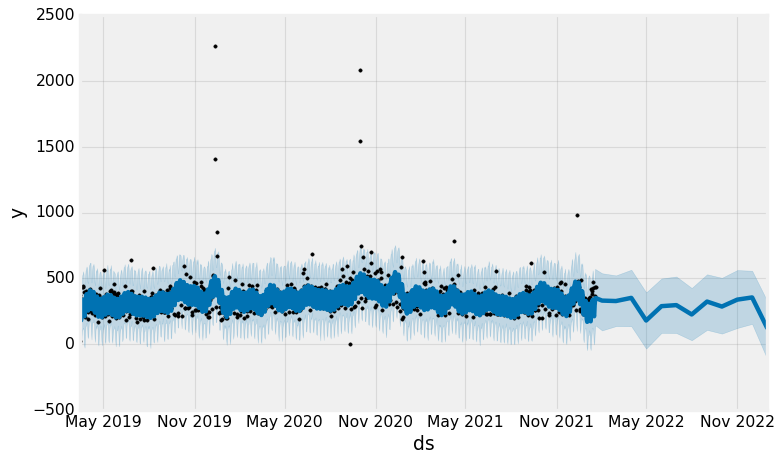

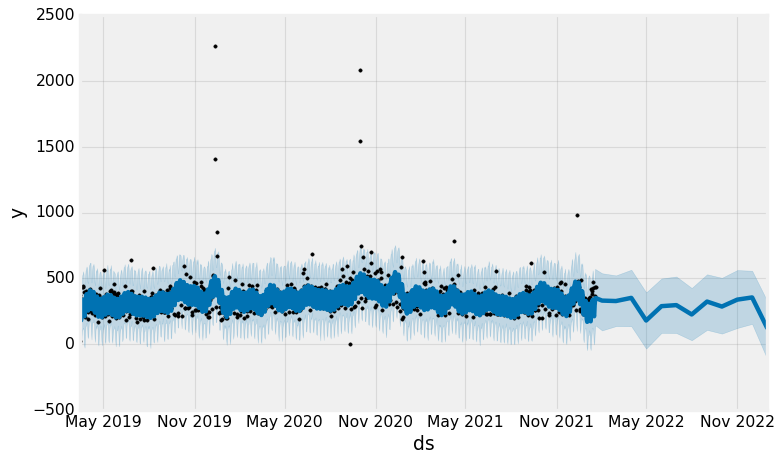

In [140]:
my_model.plot(forecast, uncertainty=True)

**Changepoints**
* Another question to answer is whether my time series encounters any underlying changes in the phenomena e.g. a new product launch, unforeseen calamity etc.  
* At such points, the growth rate is allowed to change. 
* These changepoints are automatically selected. 
* However, a user can also feed the changepoints manually if it is required. 
* In the below plot, the dotted lines represent the changepoints for the given time series.
* Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

* By default, __Prophet__ adds __25__ changepoints to the initial 80% of the data-set.

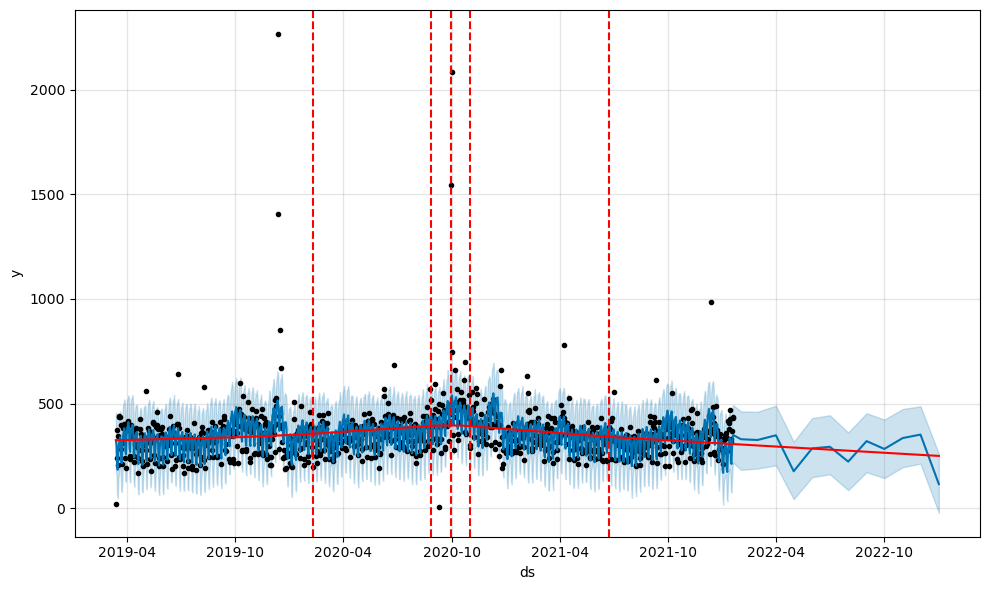

In [144]:
plt.style.use('default')
from fbprophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.64725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2636.73     0.0015434       60.2117           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       2636.94   0.000133815       68.1269   8.781e-07       0.001      198  LS failed, Hessian reset 
     180       2637.22   0.000152063       103.537   2.502e-06       0.001      326  LS failed, Hessian reset 
     199       2637.27   0.000209024       76.7874      0.2553      0.7677      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239        2637.3   3.15096e-05       61.6416   4.062e-07       0.001      443  LS failed, Hessian reset 
     256        2637.3   9.06165e-09       56.4082     0.01332    0.007684      472   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

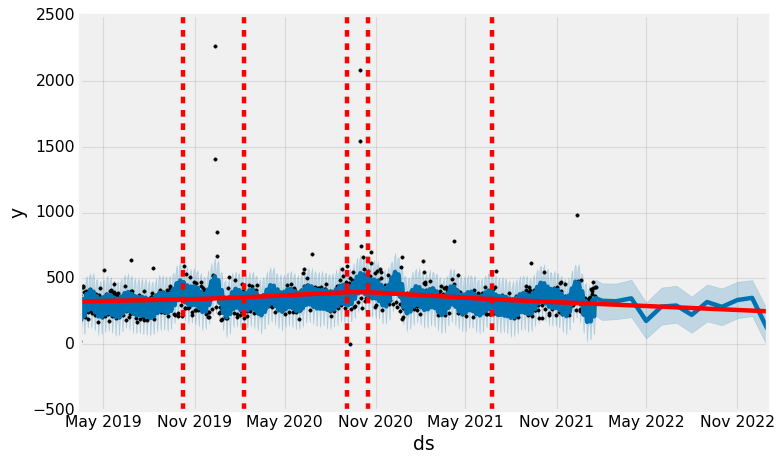

In [143]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df1).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

__Domestic violence__

In [150]:
my_model = Prophet(interval_width=0.95,daily_seasonality = True)

In [151]:
my_model.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -4.53291


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       724.872   0.000513277       67.8029   7.385e-06       0.001      157  LS failed, Hessian reset 
      99        724.89   2.04177e-05       76.4985      0.9286      0.9286      176   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       724.891   9.94303e-07       79.2944   1.325e-08       0.001      282  LS failed, Hessian reset 
     156       724.892    1.3213e-08       75.8803     0.03745           1      304   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [152]:
future_dates = my_model.make_future_dataframe(periods=12, freq='MS')
future_dates.head()

ds
0 2021-01-01
1 2021-01-02
2 2021-01-03
3 2021-01-04
4 2021-01-05

In [153]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds         yhat  yhat_lower   yhat_upper
0 2021-01-01  1777.719451  538.739584  3037.649493
1 2021-01-02  1377.361321  130.365694  2662.184543
2 2021-01-03  1478.171204  334.061783  2726.347085
3 2021-01-04  1773.088072  558.448725  2933.950189
4 2021-01-05  1881.122293  690.102167  3121.334629

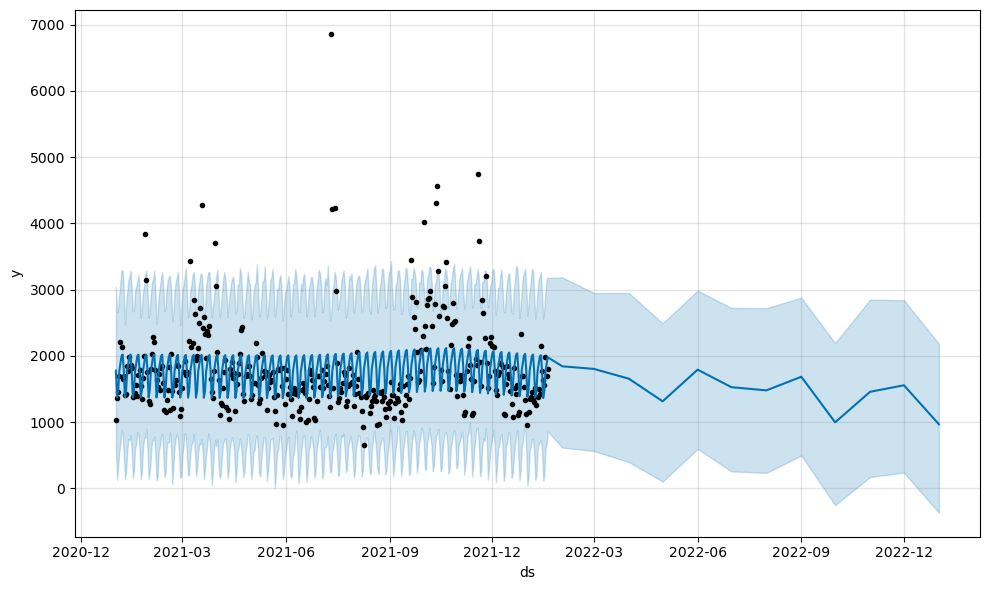

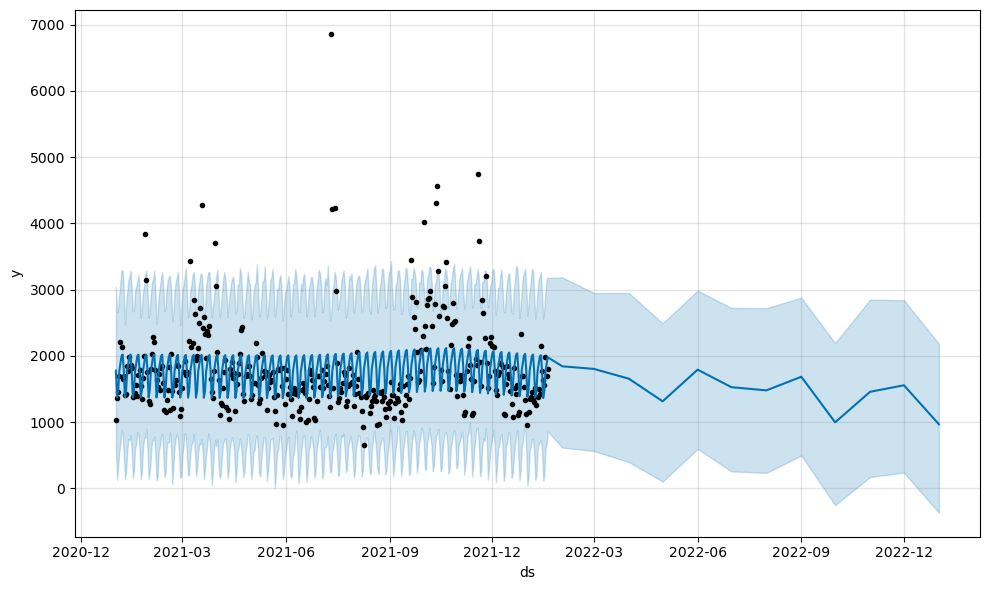

In [154]:
my_model.plot(forecast, uncertainty=True)

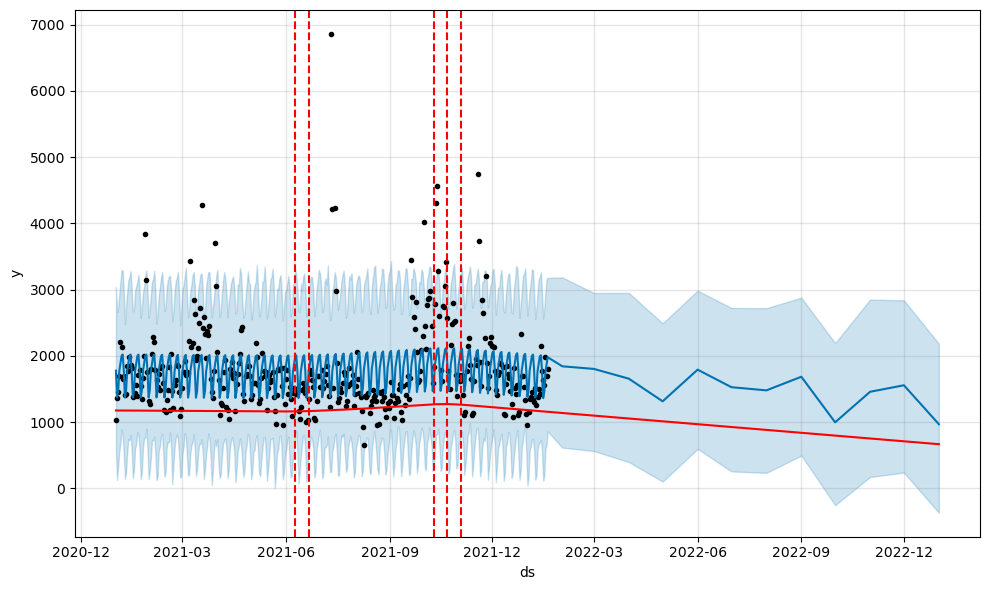

In [155]:
plt.style.use('default')
from fbprophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.64725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2636.73     0.0015434       60.2117           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       2636.94   0.000133815       68.1269   8.781e-07       0.001      198  LS failed, Hessian reset 
     180       2637.22   0.000152063       103.537   2.502e-06       0.001      326  LS failed, Hessian reset 
     199       2637.27   0.000209024       76.7874      0.2553      0.7677      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239        2637.3   3.15096e-05       61.6416   4.062e-07       0.001      443  LS failed, Hessian reset 
     256        2637.3   9.06165e-09       56.4082     0.01332    0.007684      472   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

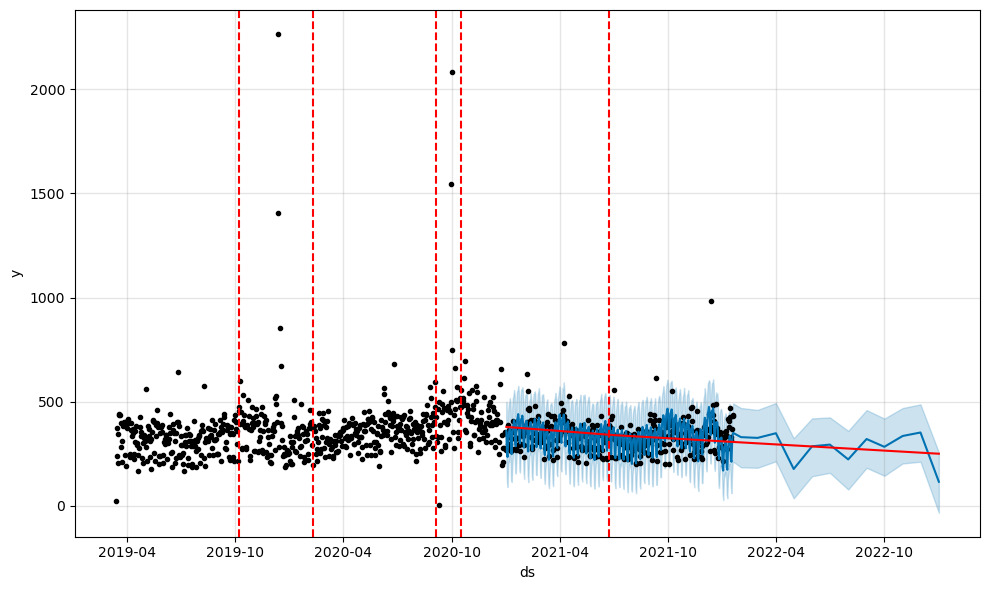

In [156]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df1).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

## Domestic Violence Organizations

**Domestic Violence Organizations**

We researched all the organizations that help victims of domestic violence and we came across 100 organizations.

In [70]:
df = pd.read_excel('Domestic Violence Associations.xlsx',engine='openpyxl')
df

Organizations   Type of Organizations  \
0                     National Center for Elder Abuse     Abuse in Later Life   
1      National Clearninghouse on Abuse in Later Life     Abuse in Later Life   
2   Institute on Domestic Violence in the African ...        African American   
3   Asian & Pacific Islander Institute on Domestic...  Asian/Pacific Islander   
4          Asian Task Force Against Domestic Violence  Asian/Pacific Islander   
..                                                ...                     ...   
94                           Rent Assistance Programs       Victim Assistance   
95                 Second Chance Employment Services        Victim Assistance   
96                    The Original 1-800-Charity Cars       Victim Assistance   
97            INCITE! Women of Color Against Violence          Women of Color   
98                             Women of Color Network          Women of Color   

             Category  
0   Domestic Violence  
1   Domestic Violence  
2   Domestic Violence  
3   Domestic Violence  
4   Domestic Violence  
..                ...  
94  Domestic Violence  
95  Domestic Violence  
96  Domestic Violence  
97  Domestic Violence  
98  Domestic Violence  

[99 rows x 3 columns]

In [71]:
import plotly.express as px
import numpy as np
fig = px.sunburst(df, path=['Category', 'Type of Organizations','Organizations'], 
                  color_continuous_scale='RdBu',width=800, height=1000)
                  #color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()
#fig.write_html("Association.html")

# __Future Work__

**Future work:**
* More Exploratory Data Analysis on the twitter data
* Descriptive Statistics and data visualization
* Try to consider other important factors that cause domestic violence
* Try to scrape data for Domestic violence organizations on twitter.
* BERT topic modeling
* Run some classification algorithms to detect Domestic violence and substance abuse

For Dataset and other information related to the project, click on my name <a href = "https://github.com/Sagarmehta2439/GSU-projects">Sagar Mehta </a> and find the link to my github profile, where you will find everything.